In [ ]:
#Imporing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Reading the data :
data_path = "/content/Data - Data.csv"
df = pd.read_csv(data_path)

In [ ]:
# Displaying the data :
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
df.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.shape

(10, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [ ]:
# Checking the Null values : Imputation/Missing Value Estimation by Mean
df.isna().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [ ]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df['Salary'].fillna(value=df['Salary'].mean(),inplace=True)

In [ ]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes


In [ ]:
df.isna().sum()

,0
Country,0
Age,0
Salary,0
Purchased,0


In [ ]:
# Now, since there is no missing values let's calculate Mean and std :
def cal_mean(vals):
  ans_mean = 0
  for i in vals:
    ans_mean += i;
  return ans_mean//len(vals)

print("The mean of the column Age is :",cal_mean(df['Age']))
print("The mean of the column Salary is :",cal_mean(df['Salary']))

The mean of the column Age is : 38.0
The mean of the column Salary is : 63777.0


In [ ]:
# Now normalizing the data :
def std_val(vals):
  mini = vals.min()
  maxi = vals.max()
  ls_norm = []
  for i in vals:
    a = (i-mini)/(maxi-mini)
    ls_norm.append(a)
  return pd.Series(ls_norm)

df['Age'] = std_val(df['Age'])
df['Salary'] = std_val(df['Salary'])
df.head()

,Country,Age,Salary,Purchased
0,France,0.739130,0.685714,No
1,Spain,0.000000,0.000000,Yes
2,Germany,0.130435,0.171429,No
3,Spain,0.478261,0.371429,No
4,Germany,0.565217,0.450794,Yes


In [ ]:
# Calculating the Pearson Correlation Coefficient :
def cal_pear(vals1,vals2):
  meani_1 = cal_mean(vals1)
  meani_2 = cal_mean(vals2)
  x_a = 0
  y_a = 0
  numi = 0
  for a in vals1:
    x_a += (a-meani_1)**2
  print(x_a)
  for b in vals2:
    y_a += (b-meani_2)**2
  print(y_a)

  dri = (x_a*y_a)**0.5
  print(dri)

  for i in range(0,len(vals1)):
    numi += (vals1[i]-meani_1)*(vals2[i]-meani_2)
  print(numi)
  return numi/dri

print("Pearson Correlation Coeeficient when standardized of Age and Salary = ",cal_pear(df['Age'],df['Salary']))

3.517421643445588
3.0146434870244394
3.256343386151412
3.164251207729468
Pearson Correlation Coeeficient when standardized of Age and Salary =  0.9717191439902825


In [ ]:
df2 = pd.read_csv(data_path)
df2['Age'].fillna(value=df2['Age'].mean(),inplace=True)
df2['Salary'].fillna(value=df2['Salary'].mean(),inplace=True)
print("Pearson Correlation Coeeficient without standardization of Age and Salary = ",cal_pear(df2['Age'],df2['Salary']))

479.60493827160496
1203555561.6049383
759757.3236435325
688956.6666666667
Pearson Correlation Coeeficient without standardization of Age and Salary =  0.9068114847023384


In [ ]:
# Ploting y = 3x+19 and y = -3x : Line Plot and Scatterplot :
x = np.random.rand(1,10)
y = (3*x)+19
print(x.shape)
print(y.shape)
print(x)
print(y)

(1, 10)
(1, 10)
[[0.3062671  0.61068147 0.9040753  0.95670386 0.24929375 0.55668558
  0.68161429 0.0910633  0.94753551 0.64977769]]
[[19.91880129 20.8320444  21.71222591 21.87011157 19.74788126 20.67005675
  21.04484287 19.27318991 21.84260653 20.94933307]]


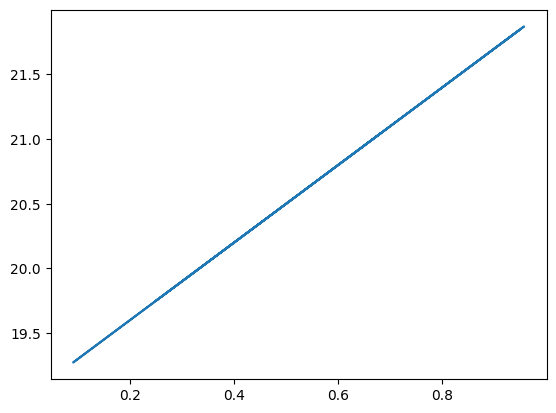

In [ ]:
plt.plot(x[0],y[0])

In [ ]:
a = np.random.rand(1,10)
b = -3*a
print(a.shape)
print(b.shape)
print(a)
print(b)

(1, 10)
(1, 10)
[[0.86745528 0.50829876 0.56637344 0.14234218 0.44406362 0.23082916
  0.64658783 0.11743035 0.32971261 0.32867393]]
[[-2.60236584 -1.52489627 -1.69912033 -0.42702654 -1.33219086 -0.69248748
  -1.93976348 -0.35229105 -0.98913782 -0.9860218 ]]


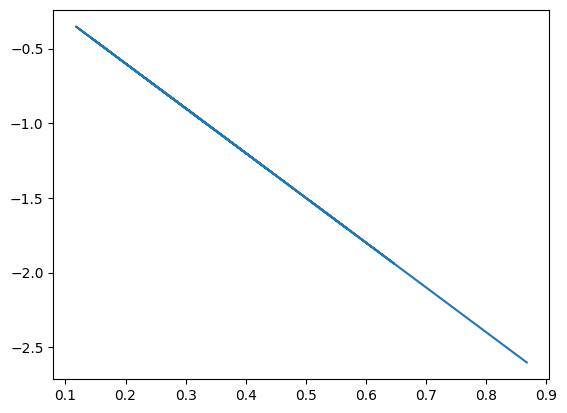

In [ ]:
plt.plot(a[0],b[0])

In [ ]:
# Now calculating correlation between y,b :
print(x[0])
print(a[0])

[0.3062671  0.61068147 0.9040753  0.95670386 0.24929375 0.55668558
 0.68161429 0.0910633  0.94753551 0.64977769]
[0.86745528 0.50829876 0.56637344 0.14234218 0.44406362 0.23082916
 0.64658783 0.11743035 0.32971261 0.32867393]


In [ ]:
print("Correlation between x and y : ",cal_pear(pd.Series(x[0]),pd.Series(y[0])))

4.364337183244252
13.556847517395001
7.691986330444141
7.139313694432211
Correlation between x and y :  0.9281495556193976


In [ ]:
# Not working on -vely correlated :
p = np.random.rand(1,10)
q = -3*p
print("Correlation between p and q : ",cal_pear(p[0],q[0]))

1.4710721773472226
4.155873487161952
2.4725674630915386
-1.2325871805478257
Correlation between p and q :  -0.49850497466575827


In [ ]:
from scipy import stats
res = stats.pearsonr(a[0], b[0])
res

PearsonRResult(statistic=-0.9999999999999999, pvalue=0.0)

In [ ]:
# Now plotting Histogram for df2 :
df2.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes


In [ ]:
df2.shape

(10, 4)

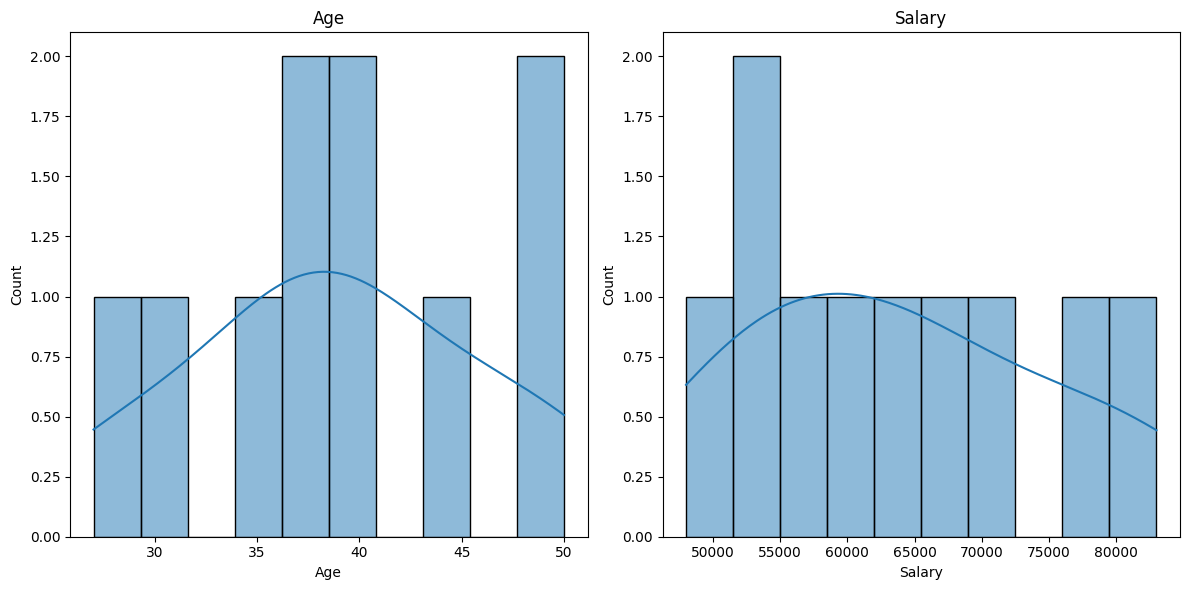

In [ ]:
# Plotting using Subplot (Without Normalization):
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df2['Age'],bins=10,kde = True)
plt.title("Age")

plt.subplot(1,2,2)
sns.histplot(df2['Salary'],bins=10,kde = True)
plt.title("Salary")

plt.tight_layout()
plt.show()

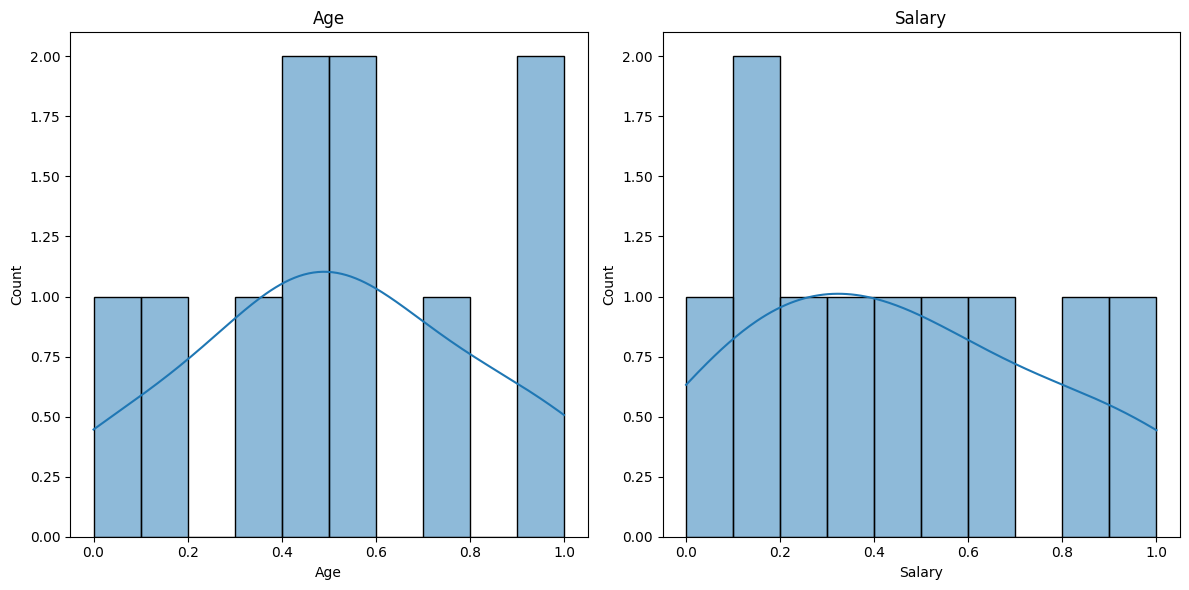

In [ ]:
# Plotting using Subplot (With Normalization):
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Age'],bins=10,kde = True)
plt.title("Age")

plt.subplot(1,2,2)
sns.histplot(df['Salary'],bins=10,kde = True)
plt.title("Salary")

plt.tight_layout()
plt.show()